If there is a setup then install it.

ls */setup.py

# Load some repos as submodules.

In [1]:
    from importnb import Interactive

In [40]:
    with Interactive():
        from install import repos
        from compute_environment import write as write_deps, dependencies

# All the dependencies

In [16]:
    from importnb import Notebook, Execute
    from importnb.capture import capture_output
    from importnb.execute import Interactive


    from IPython import display as d
    import pandas
    import timeout_decorator
    

    import os
    modules = {}

    from poser import *
    from collections import ChainMap

In [17]:
kernel_name = 'bench'

    !source activate $kernel_name && pip install importnb timeout_decorator poser pyyaml

In [18]:
env = ChainMap()

In [19]:
with capture_output():
    for directory in λ.map(a.str.rsplit('/', 1).last().Path())(repos):
        if (directory / 'requirements.txt').exists():
            env = λ.Path.read_text().str.splitlines()[lambda x: {'dependencies': [
                {'pip': x}
            ]}][{directory: λ.identity()}][env.new_child](directory / 'requirements.txt')
        if (directory / 'environment.yml').exists():
            env = λ.Path.read_text().io.StringIO().yaml.safe_load()[{directory: λ.identity()}][env.new_child](directory / 'environment.yml')

In [20]:
    dependencies = (
        λ / λ.valmap(λ.get('dependencies')).dict.values()
    ).concat().list()[lambda x: sum(x, [])](env.maps)

    dependencies = (
        λ
        .filter(λ**dict)
        .map(x['pip'])
        .concat().map(a.str.split('==').first()).unique().list()
        [[λ[{'pip': λ.identity()}]]]
    ).concatv(
        (λ//λ**str*a.unique().sorted().list())(dependencies)
    ).list()[{
        'name': kernel_name,
        'channels': (
            λ.map(dict.values)
            .concat().map(λ.methodcaller('get', 'channels', [])).concat().unique().sorted().list()
        )(env.maps),
        'dependencies': λ.identity(),
    }](dependencies)
    dependencies['dependencies'][-1]['pip'] = list(set(dependencies['dependencies'][-1]['pip']) - set(dependencies['dependencies'][:-1]))

In [21]:
with open('environment.yml', 'w') as f:
    λ.yaml.safe_dump(default_flow_style=False)[f.write](dependencies)

    !conda create -yn $kernel_name python=3.6

    !conda env update -n $kernel_name 

# The setups

In [22]:
with capture_output():
    for directory in λ.map(a.str.rsplit('/', 1).last().Path())(repos):
        if (directory / 'setup.py').exists():
            !source activate $kernel_name && cd $directory && python setup.py develop

In [23]:
     display = dict(stdout=True, display=True, stderr=True,)

In [31]:
    timeout = 10

    !conda install -yn $kernel_name astropy

    import os

    os.chdir('../..')

In [32]:
import pydmd

    with Notebook(dir='PyDMD/tutorials/') as l:
        test = l.from_filename('tutorial-1-dmd.ipynb')

    with Notebook(dir='NeuNorm/notebooks') as l:
        l.from_filename('tutorial_using_array_input_and_several_roi.ipynb')

In [33]:
    from pathlib import Path

In [34]:
    current = Path('PyDMD/')
    with Interactive(**display, exceptions=BaseException, dir='PyDMD/tutorials') as loader:
        for i, file in enumerate(Path().rglob('*.ipynb')):
            if 'checkpoint' not in str(file):
                print(current, file)
                modules[current/file.name] = timeout_decorator.timeout(timeout)(loader.from_filename)(file.name)
                print('Excepts', modules[current/file.name]._exception)

PyDMD tutorial-1-dmd.ipynb
Excepts None
PyDMD tutorial-2-adv-dmd.ipynb
Excepts 'Timed Out'
PyDMD tutorial-3-mrdmd.ipynb
Excepts 'Timed Out'
PyDMD tutorial-4-cdmd.ipynb
Excepts 'Timed Out'
PyDMD tutorial-5-fbdmd.ipynb
Excepts None
PyDMD tutorial-6-hodmd.ipynb
Excepts None


In [35]:
    current = Path('NeuNorm/')
    with Interactive(**display, exceptions=BaseException, dir='NeuNorm/notebooks') as loader:
        for i, file in enumerate(Path().rglob('*.ipynb')):
            if 'checkpoint' not in str(file):
                print(current, file)
                modules[current/file.name] = timeout_decorator.timeout(timeout)(loader.from_filename)(file.name)

NeuNorm debugging_multi_roi_bug.ipynb
NeuNorm ipts-16259.ipynb
NeuNorm notebook_display_with_time_estimation.ipynb
NeuNorm testing_new_auto_gamma_filtering.ipynb
NeuNorm tutorial_normalization_with_fewer_ob_than_sample.ipynb
NeuNorm tutorial_normalization_with_fewer_ob_than_sample_MAYBE_BUG.ipynb
NeuNorm tutorial_using_array_input.ipynb
NeuNorm tutorial_using_array_input_and_export_array.ipynb
NeuNorm tutorial_using_array_input_and_several_roi.ipynb
NeuNorm tutorial_using_folder_input.ipynb


ThinkDSP/code cacophony.ipynb
ThinkDSP/code chap01.ipynb
ThinkDSP/code chap01soln.ipynb
ThinkDSP/code chap02.ipynb
ThinkDSP/code chap02soln.ipynb
ThinkDSP/code chap03.ipynb
ThinkDSP/code chap03soln.ipynb
ThinkDSP/code chap04.ipynb
ThinkDSP/code chap04soln.ipynb
ThinkDSP/code chap05soln.ipynb
ThinkDSP/code chap06.ipynb
ThinkDSP/code chap06soln.ipynb
ThinkDSP/code chap06starter.ipynb
ThinkDSP/code chap07.ipynb
ThinkDSP/code chap07soln.ipynb
ThinkDSP/code chap08.ipynb
ThinkDSP/code chap09.ipynb
ThinkDSP/code chap09soln.ipynb
ThinkDSP/code chap10.ipynb
ThinkDSP/code chap10preview.ipynb
ThinkDSP/code chap10soln.ipynb
ThinkDSP/code chap11.ipynb
ThinkDSP/code chap11soln.ipynb
ThinkDSP/code diff_int.ipynb
ThinkDSP/code phase.ipynb
ThinkDSP/code saxophone.ipynb
ThinkDSP/code scipy2015_demo.ipynb
ThinkDSP/code voss.ipynb


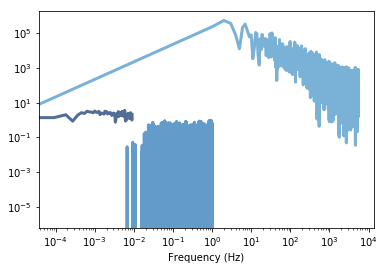

In [36]:
    current = Path('ThinkDSP/code/')
    with Interactive(**display, exceptions=BaseException, dir=current) as loader:
        for i, file in enumerate(Path().rglob('*.ipynb')):
            if 'checkpoint' not in str(file):
                print(current, file)
                modules[current/file.name] = timeout_decorator.timeout(timeout)(loader.from_filename)(file)
                print('Excepts', modules[current/file.name]._exception)

In [38]:
    from importnb.capture import capture_output

00.00-Preface.ipynb
Excepts None
01.00-IPython-Beyond-Normal-Python.ipynb
Excepts None
01.01-Help-And-Documentation.ipynb
Excepts None
01.02-Shell-Keyboard-Shortcuts.ipynb
Excepts None
01.03-Magic-Commands.ipynb
Excepts None
01.04-Input-Output-History.ipynb
Excepts None
01.05-IPython-And-Shell-Commands.ipynb
Excepts None
01.06-Errors-and-Debugging.ipynb
Excepts division by zero
01.07-Timing-and-Profiling.ipynb
Excepts 'Timed Out'
01.08-More-IPython-Resources.ipynb
Excepts None
02.00-Introduction-to-NumPy.ipynb
Excepts None
02.01-Understanding-Data-Types.ipynb
Excepts None
02.02-The-Basics-Of-NumPy-Arrays.ipynb
Excepts None
02.03-Computation-on-arrays-ufuncs.ipynb
Excepts 'Timed Out'
02.04-Computation-on-arrays-aggregates.ipynb
Excepts 'Timed Out'
02.05-Computation-on-arrays-broadcasting.ipynb
Excepts operands could not be broadcast together with shapes (3,2) (3,) 
02.06-Boolean-Arrays-and-Masks.ipynb
Excepts The truth value of an array with more than one element is ambiguous. Use a.any

ValueError: No axis named col for object type <class 'pandas.core.frame.DataFrame'>

ValueError: No axis named col for object type <class 'pandas.core.frame.DataFrame'>

Excepts None
03.07-Merge-and-Join.ipynb
Excepts None
03.08-Aggregation-and-Grouping.ipynb
Excepts None
03.09-Pivot-Tables.ipynb
Excepts None
03.10-Working-With-Strings.ipynb
Excepts 'NoneType' object has no attribute 'capitalize'
03.11-Working-with-Time-Series.ipynb
Excepts cannot import name 'is_list_like'
03.12-Performance-Eval-and-Query.ipynb
Excepts 'Timed Out'
03.13-Further-Resources.ipynb
Excepts None
04.00-Introduction-To-Matplotlib.ipynb
Excepts None
04.01-Simple-Line-Plots.ipynb
Excepts None
04.02-Simple-Scatter-Plots.ipynb
Excepts None
04.03-Errorbars.ipynb
Excepts None
04.04-Density-and-Contour-Plots.ipynb
Excepts None
04.05-Histograms-and-Binnings.ipynb
Excepts None
04.06-Customizing-Legends.ipynb
Excepts None
04.07-Customizing-Colorbars.ipynb
Excepts None
04.08-Multiple-Subplots.ipynb
Excepts None
04.09-Text-and-Annotation.ipynb
Excepts None
04.10-Customizing-Ticks.ipynb
Excepts None
04.11-Settings-and-Stylesheets.ipynb
Excepts Unknown property axisbg
04.12-Three-Dimension

TimeoutError: 'Timed Out'

Excepts None
05.09-Principal-Component-Analysis.ipynb
Excepts Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gi

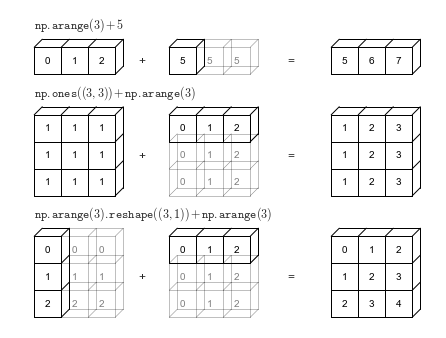

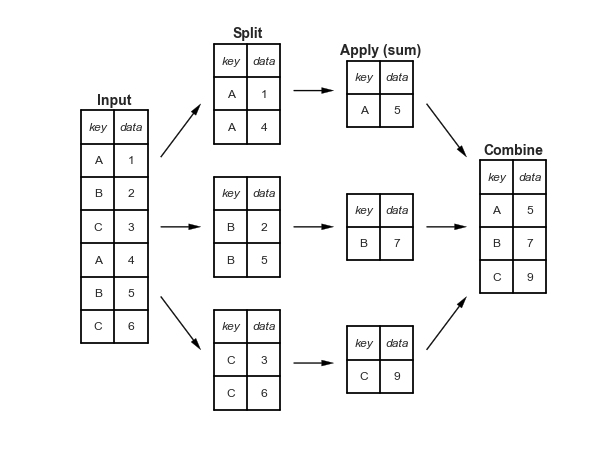

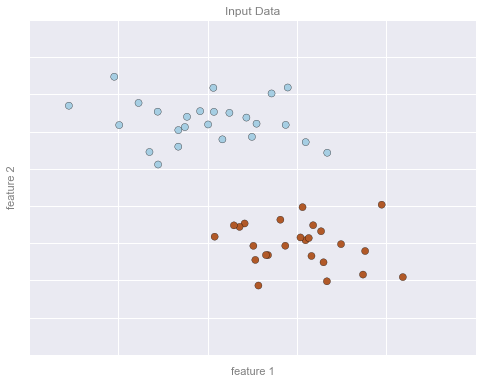

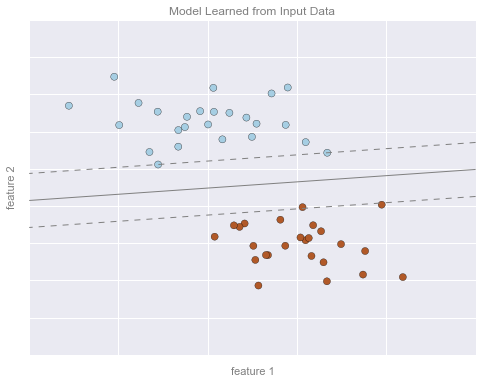

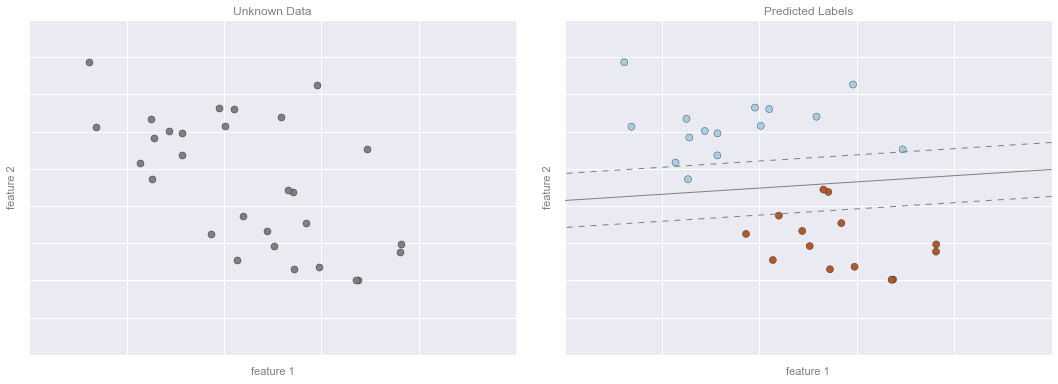

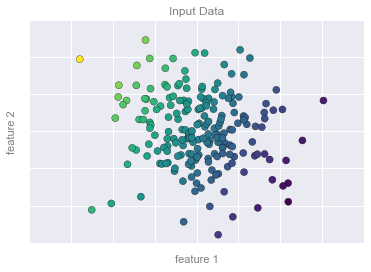

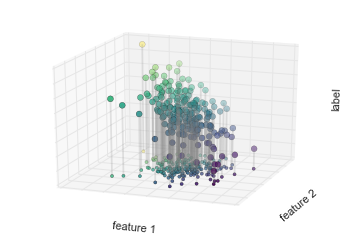

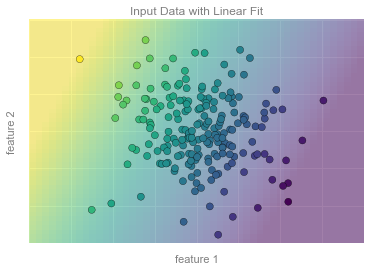

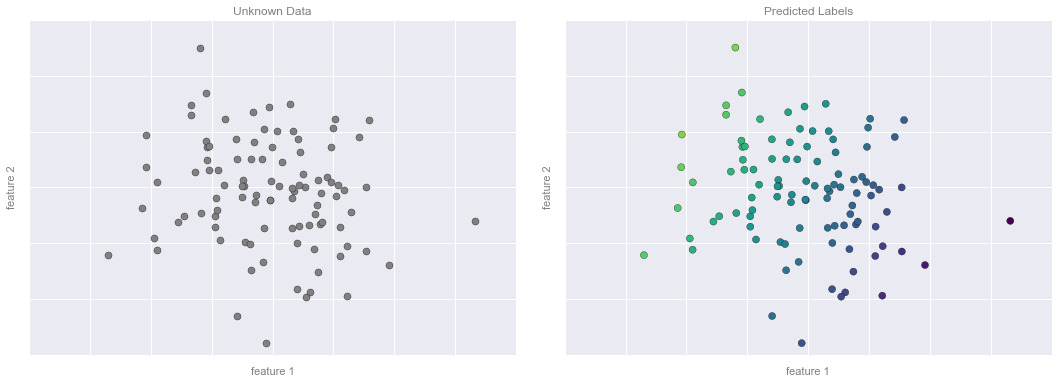

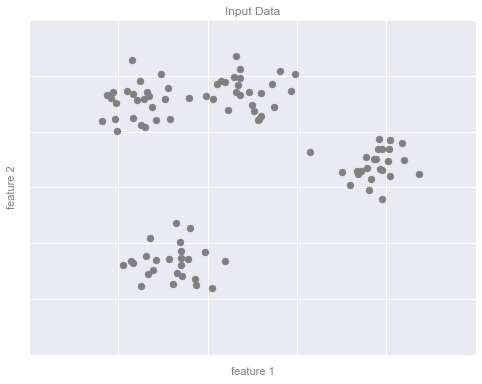

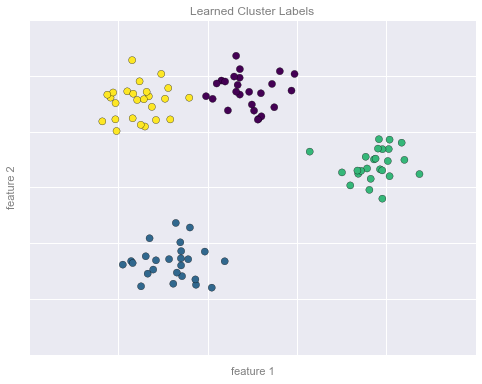

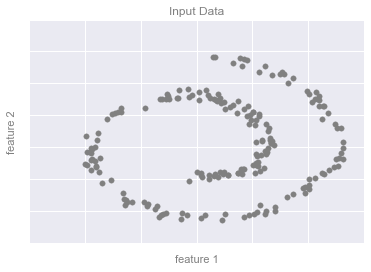

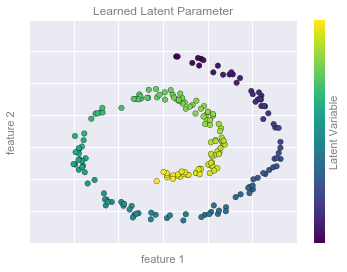

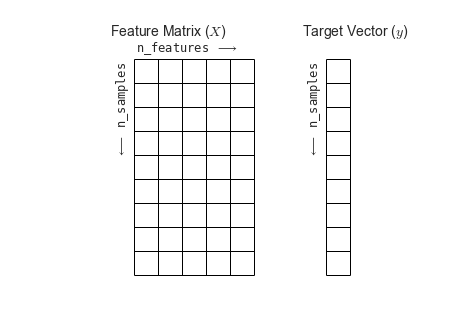

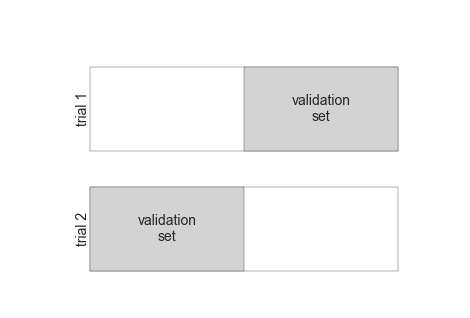

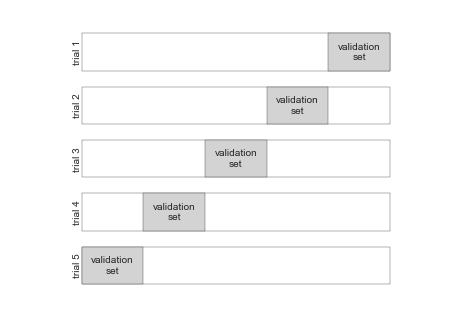

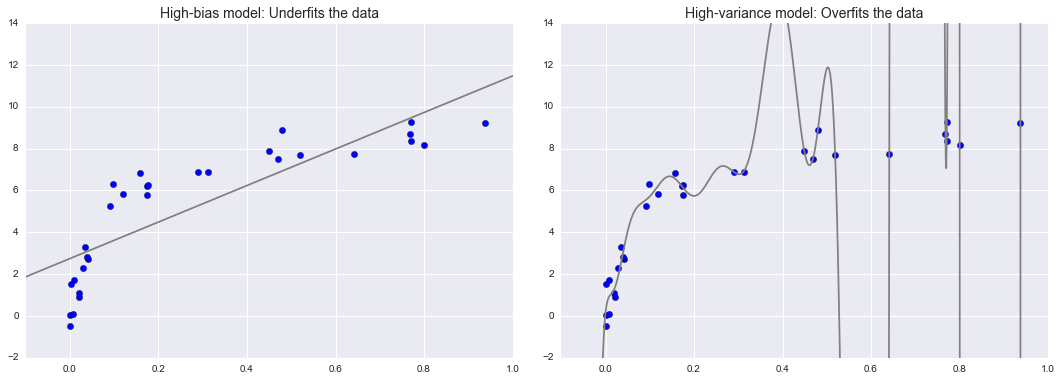

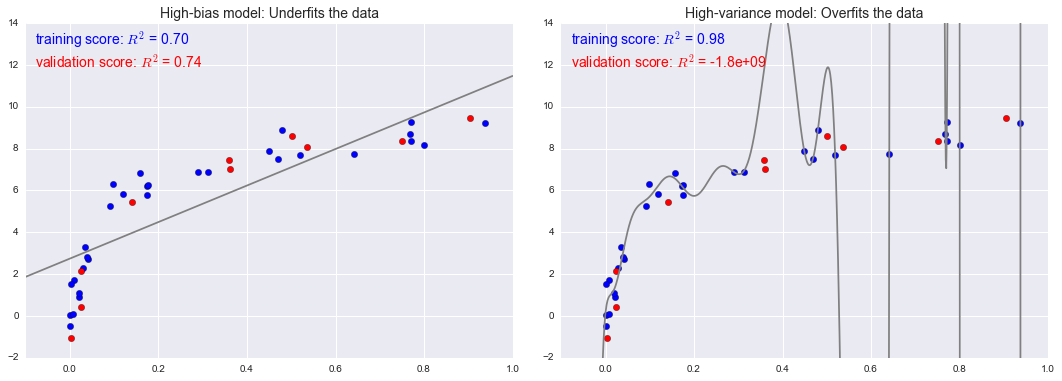

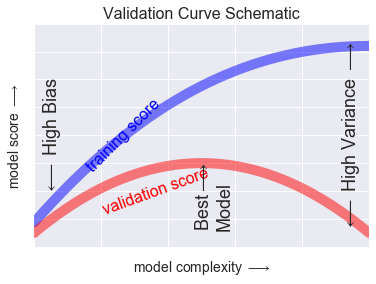

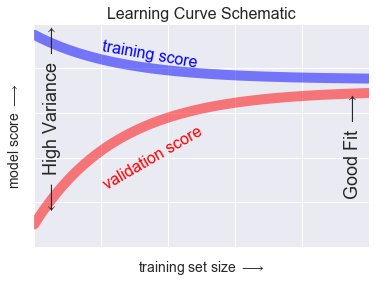

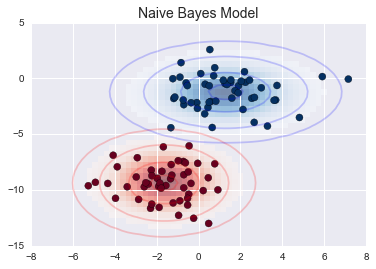

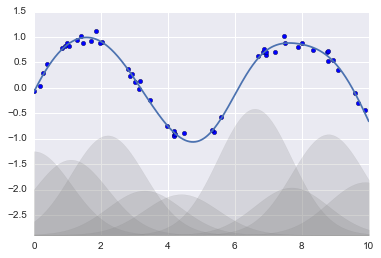

In [39]:
    current = Path('PythonDataScienceHandbook/notebooks/')
    
    with capture_output(stdout=False), Interactive(exceptions=BaseException, stdout=True, display=True, stderr=True, dir=current) as loader:
        for i, file in enumerate(Path().rglob('*.ipynb')):
            if 'checkpoint' not in str(file):
                with capture_output(stdout=False):
                    print(file)
                    modules[current/file.name] = timeout_decorator.timeout(timeout)(loader.from_filename)(file)
                    print('Excepts', modules[current/file.name]._exception)

In [41]:
    current = Path('pyunfold')
    with Interactive(exceptions=BaseException, stdout=True, display=True, stderr=True) as loader:
        for i, file in enumerate(Path(current).rglob('*.ipynb')):
            if 'checkpoint' not in str(file):
                with capture_output(stdout=False):
                    print(file)
                    modules[current/file.name] = timeout_decorator.timeout(timeout)(loader.from_filename)(file)

pyunfold/docs/source/notebooks/multivariate.ipynb
pyunfold/docs/source/notebooks/regularization.ipynb
pyunfold/docs/source/notebooks/tutorial.ipynb
pyunfold/docs/source/notebooks/user_prior.ipynb


In [42]:
    df = pandas.DataFrame(dict(zip(modules, map(vars, modules.values())))).T

    df = pandas.concat({
        file: pandas.DataFrame(df['_notebook'].loc[file]['cells'])
        for file in df['_notebook'].dropna().index
    }).reset_index(-1, drop=True).join(df)

    languages = df['_notebook'].groupby([df.index, df.cell_type]).count().unstack()

    g = df['_exception'].groupby(df.index).unique().apply(lambda x: not x[0]).pipe(
        lambda s: s.groupby(s.index.map(lambda x: x.parent)).agg(('sum', 'count'))).astype(int)

In [43]:
    (g['sum']/g['count']).to_frame('percentages')

,percentages
NeuNorm,0.500000
PyDMD,0.500000
PythonDataScienceHandbook/notebooks,0.602941
ThinkDSP/code,0.666667
pyunfold,1.000000


In [44]:
    df.sample(2)

,cell_type,execution_count,metadata,outputs,source,A,Audio,B,BDay,BaggingClassifier,...,ys2,ytest,ytrain,ytrue,yy,z,zdata,zero_angle,zline,zz
PythonDataScienceHandbook/notebooks/03.04-Missing-Values.ipynb,markdown,NaN,{'lineno': 127},NaN,This ``dtype=object`` means that the best comm...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ThinkDSP/code/chap11.ipynb,code,47.0,"{'collapsed': False, 'lineno': 1452}","[{'data': {'text/html': ['\n', ' ...",filtered.make_audio(),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
    len(df.columns)

817

# The displays

In [47]:
button = λ.ipywidgets.Button(description="Show 💩")()

def sample(i=10):
    λ.do(λ.IPython.display.clear_output()).IPython.display.display(button)()
    #λ.IPython.display.display(button)()

    s = (
        df['_notebook']
        .sample(5)
        .apply(
            λ.get('cells')
            .filter(
                λ.itemgetter('cell_type')
                .eq('code')
            )
            .pluck('outputs').concat().filter(λ.contains('data')).pluck('data').list()
        )
    ).pipe(lambda x: x[x.astype(bool)])
    
    (
        λ.take(5).map(
            the.do(
                λ.first()['# [{0}]({0})'.format].IPython.display.Markdown().IPython.display.display()
            ).second().map(λ.IPython.display.publish_display_data()).list()
        ).list().len()
    )(s.items())

    λ.IPython.display.display(button)()
    return s

In [48]:
button.on_click(sample)

In [49]:
%%html
<style>
    #notebook .output {
        display: flex !important;
        flex-direction: row;
        flex-wrap: wrap;
        max-width: 90vw;
        align-items: center;
    }
    #notebook .output_markdown {
        /*min-width: 88vw;*/
            word-wrap: break-word;
    }
    #notebook .output_area {
        flex: 1;
        min-width: 30rem;
        transition: all 0.2s;
        z-index: 999;
    }
    #notebook div.output_subarea {
        padding: 0 !important;
    }
    #notebook .output_area:hover {
        flex: 10;
        transition: all 0.2s;
        z-index: 999;
    }
</style>

Button(description='Show 💩', style=ButtonStyle())

None

# [PythonDataScienceHandbook/notebooks/06.00-Figure-Code.ipynb](PythonDataScienceHandbook/notebooks/06.00-Figure-Code.ipynb)

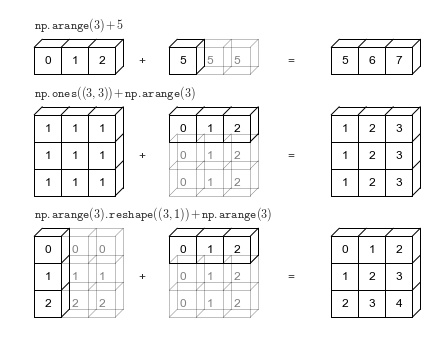

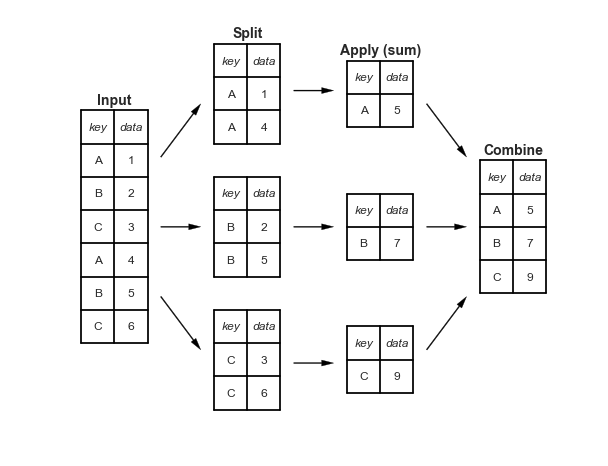

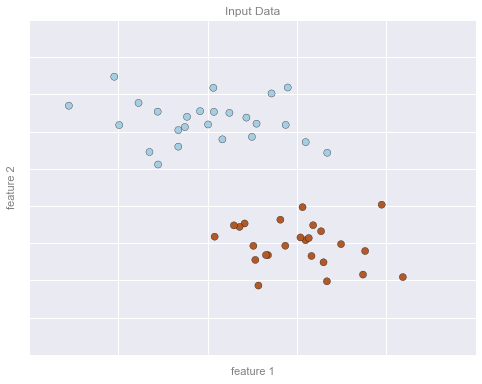

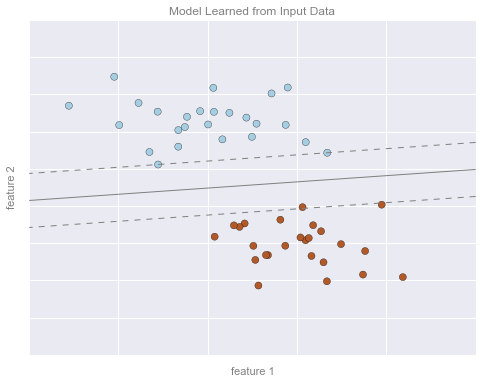

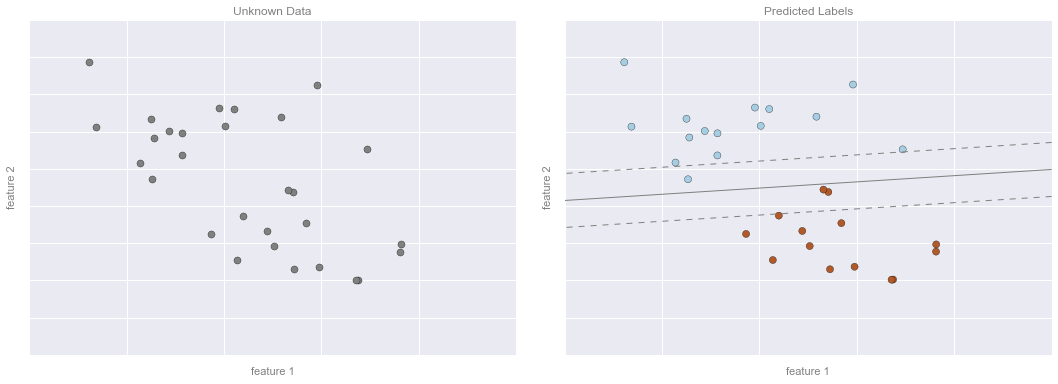

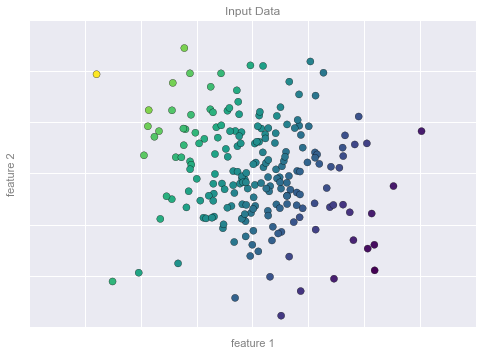

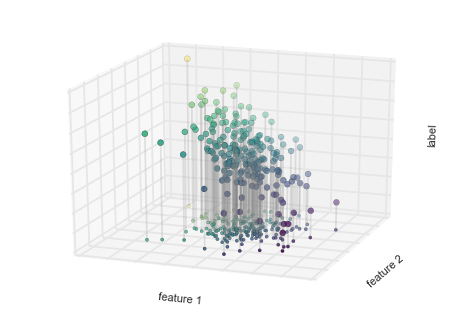

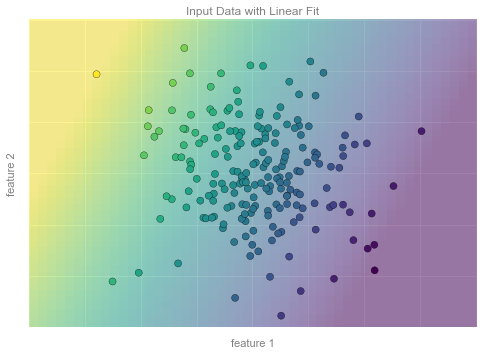

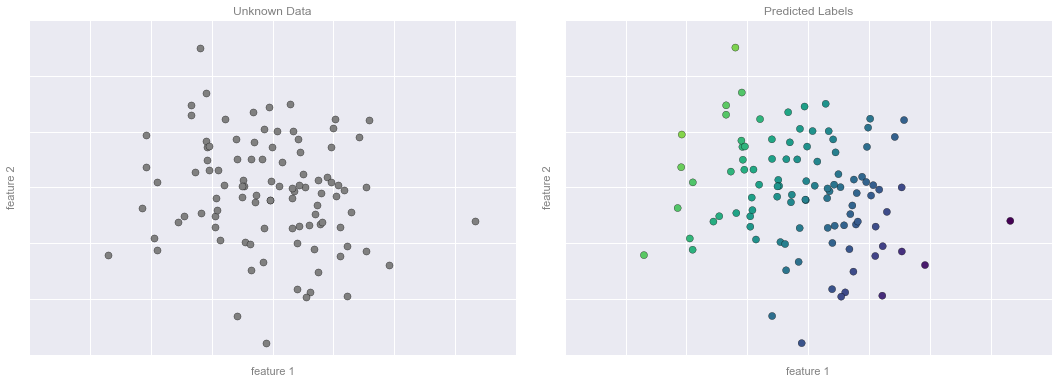

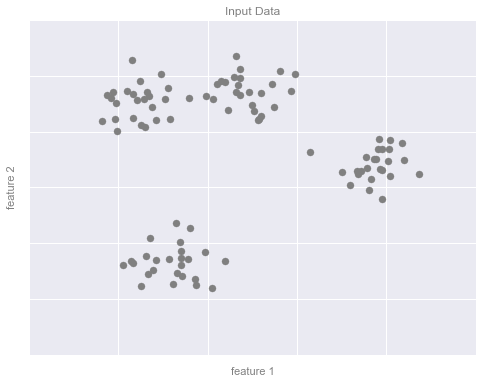

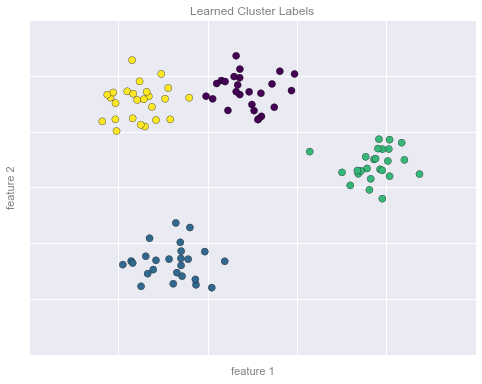

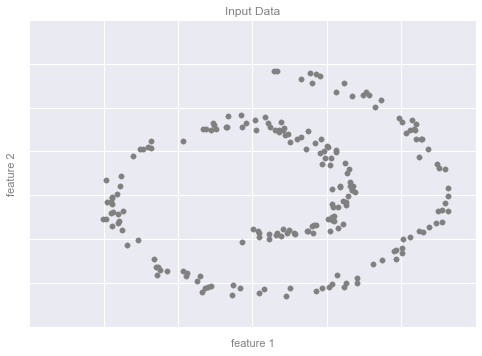

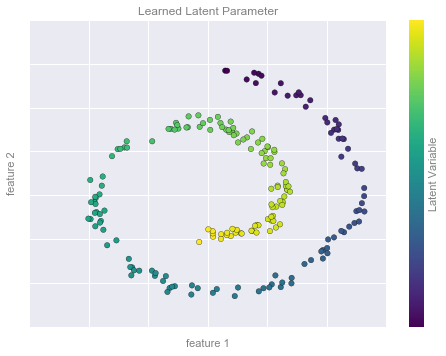

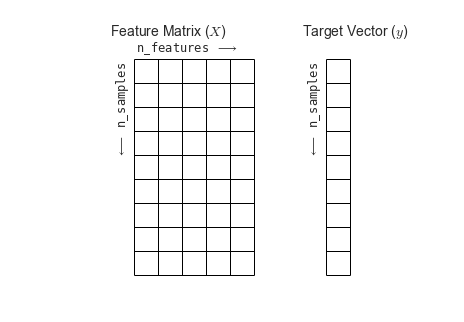

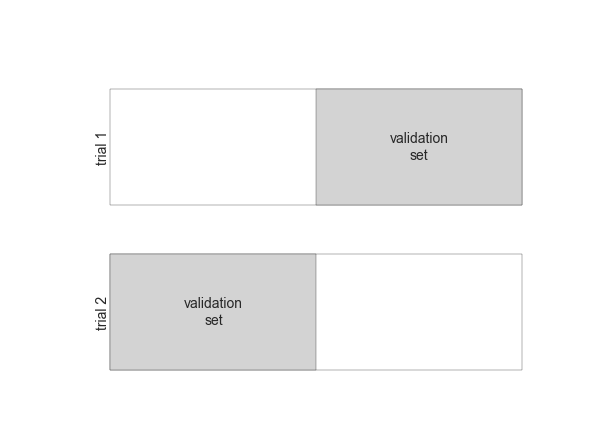

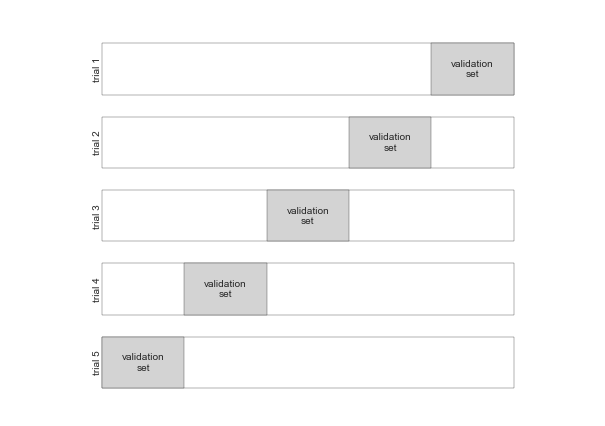

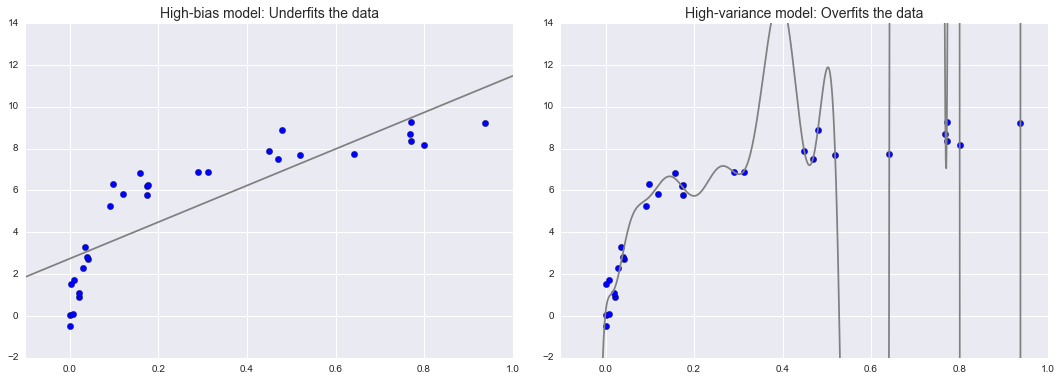

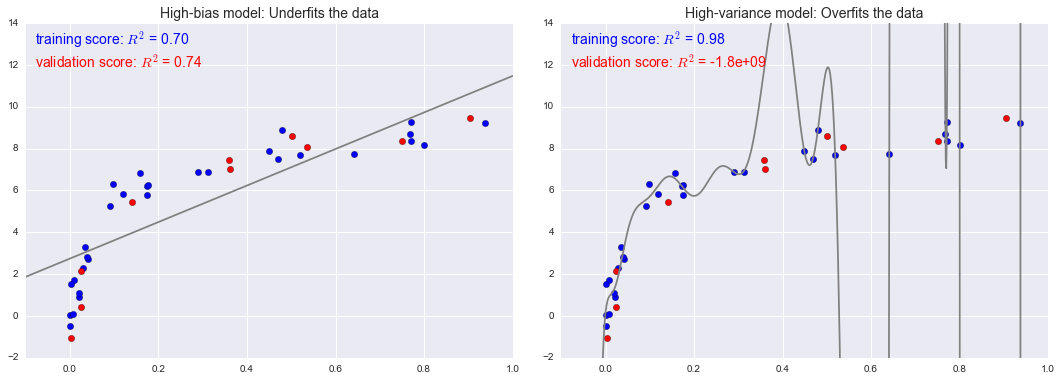

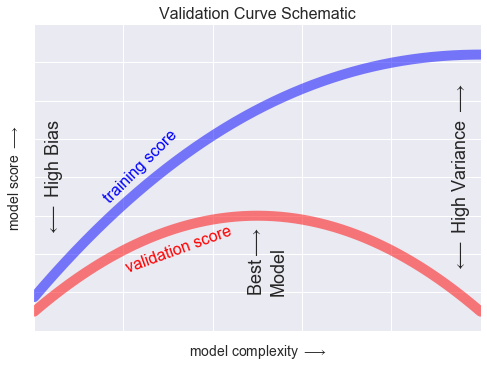

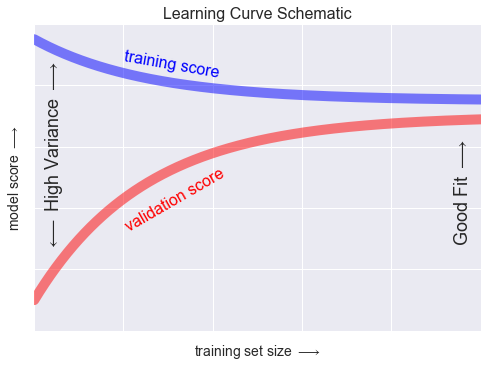

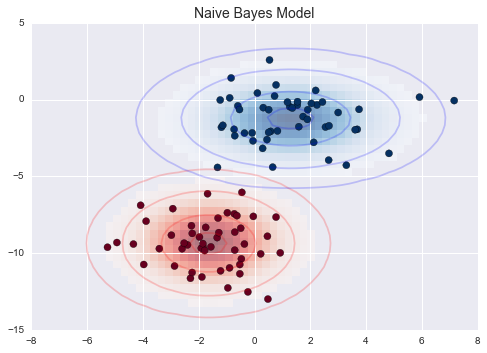

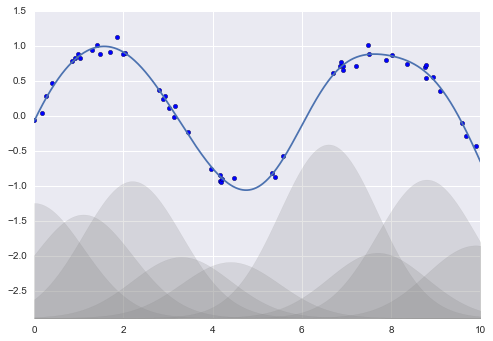

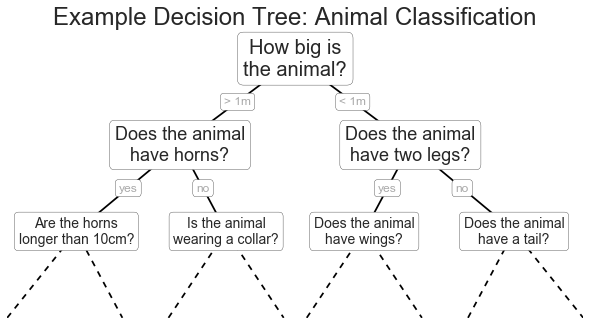

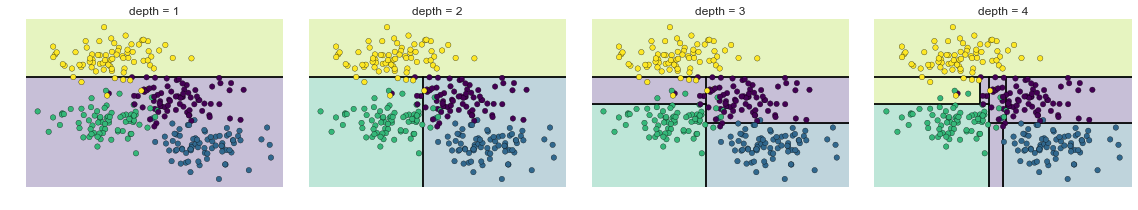

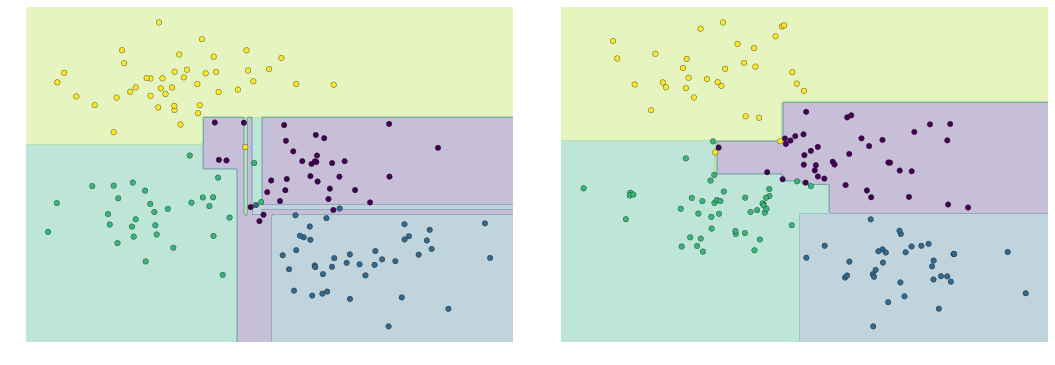

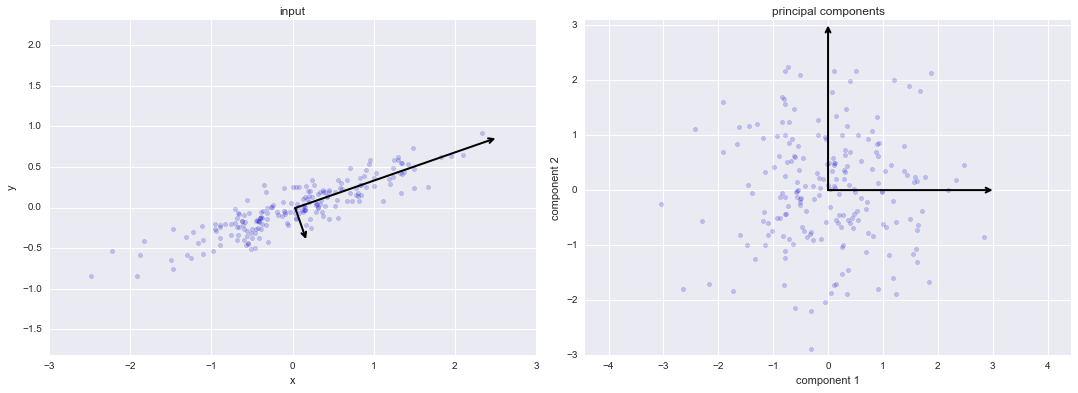

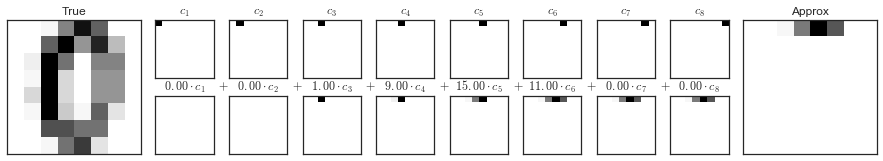

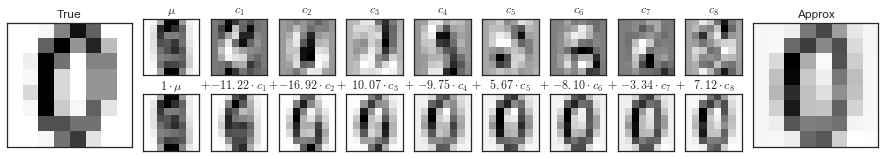

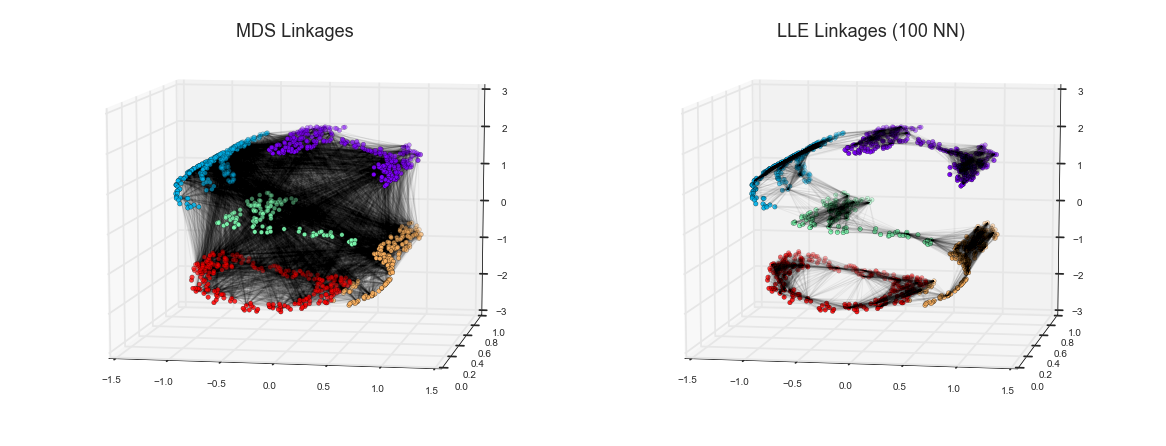

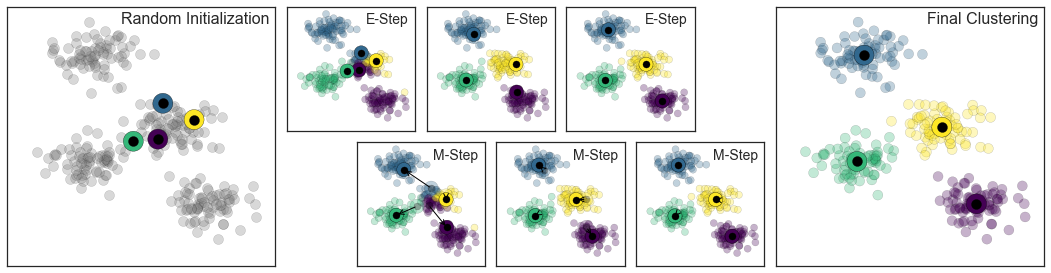

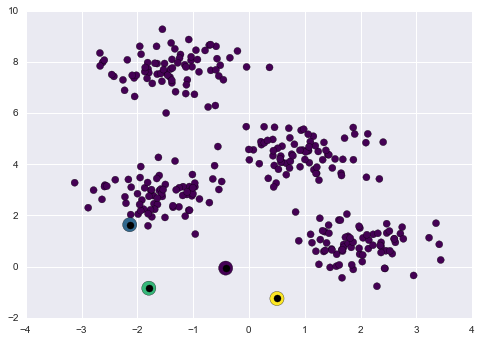

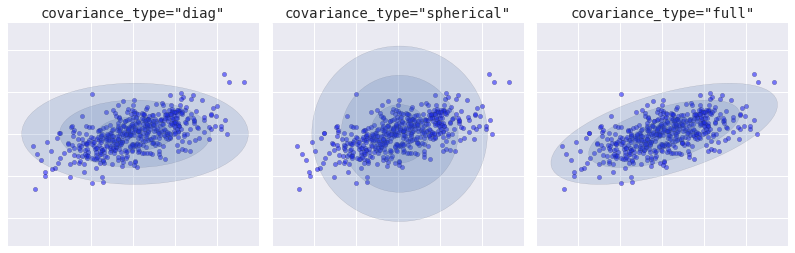

# [PythonDataScienceHandbook/notebooks/03.11-Working-with-Time-Series.ipynb](PythonDataScienceHandbook/notebooks/03.11-Working-with-Time-Series.ipynb)

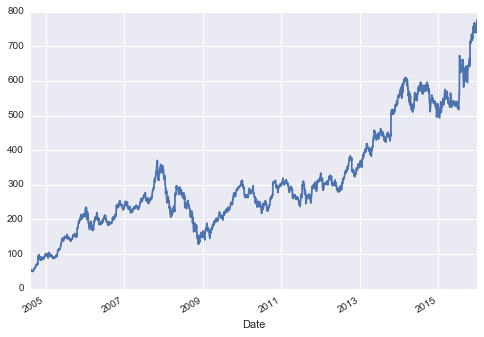

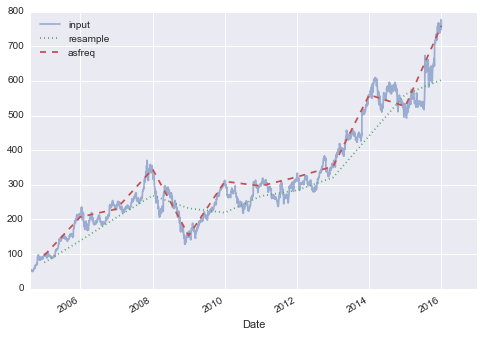

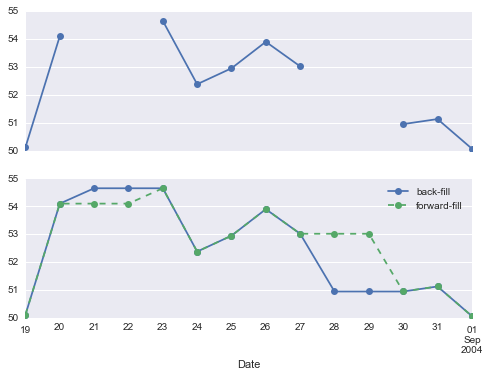

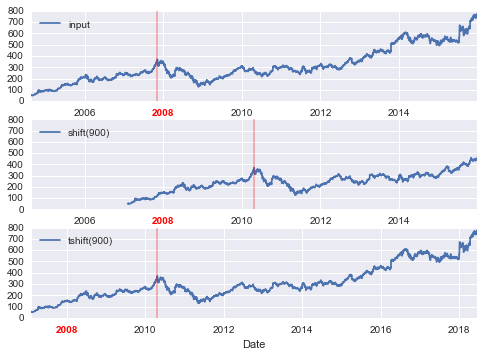

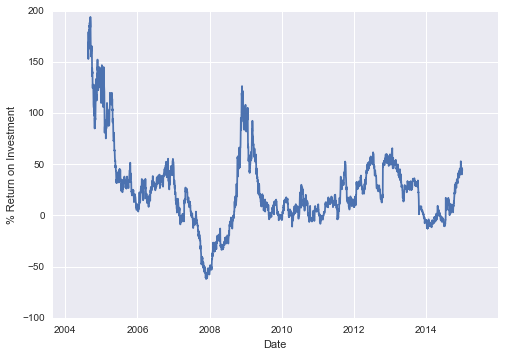

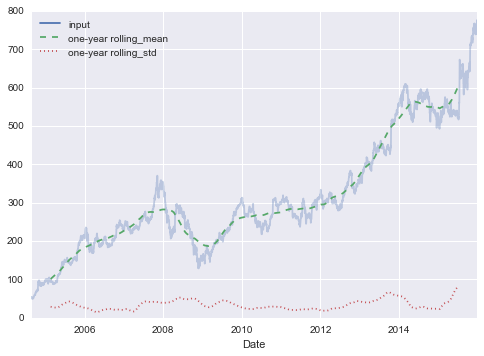

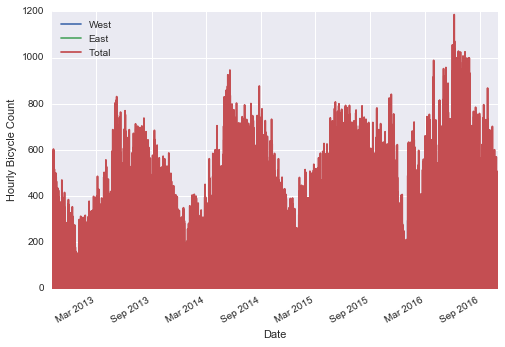

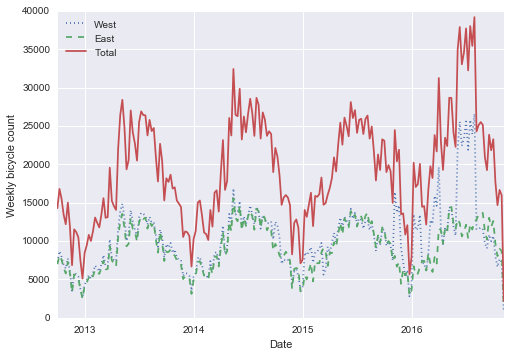

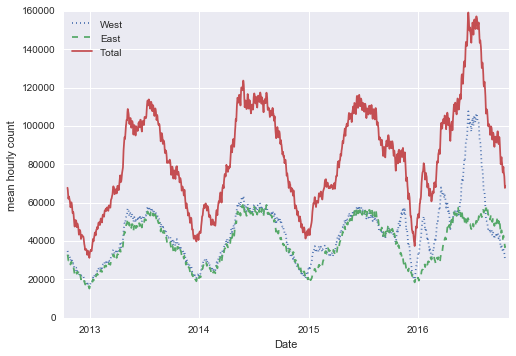

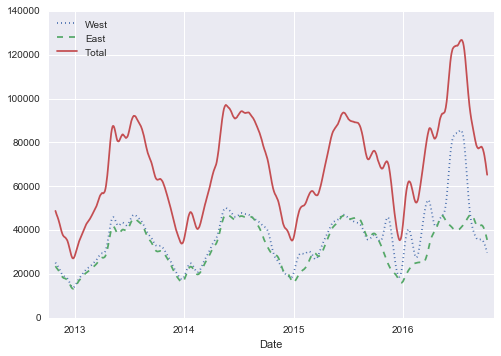

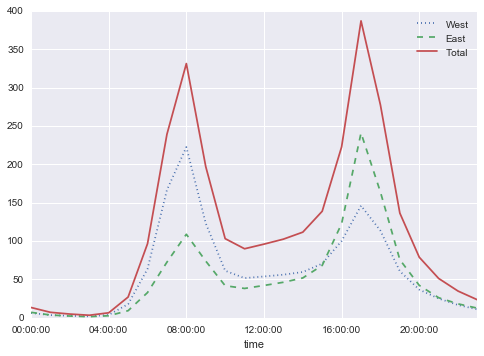

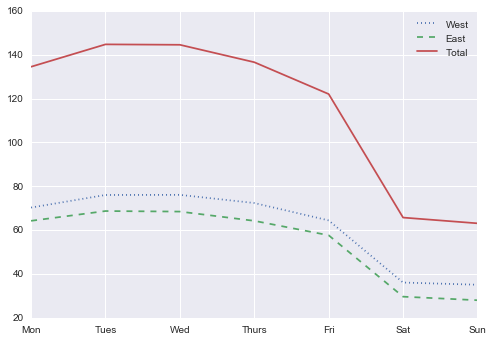

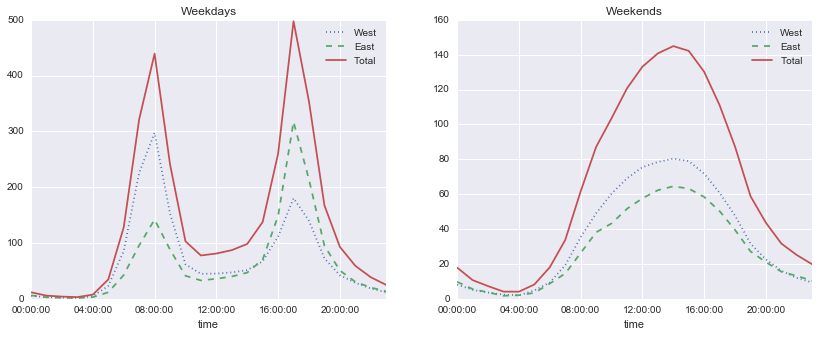

# [PythonDataScienceHandbook/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb](PythonDataScienceHandbook/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

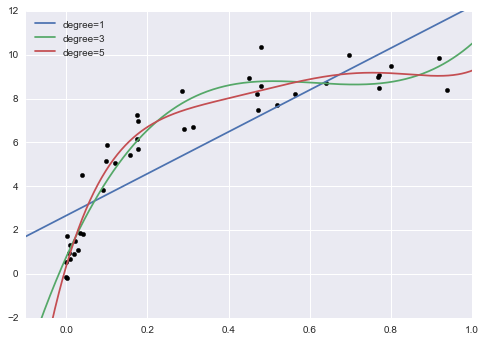

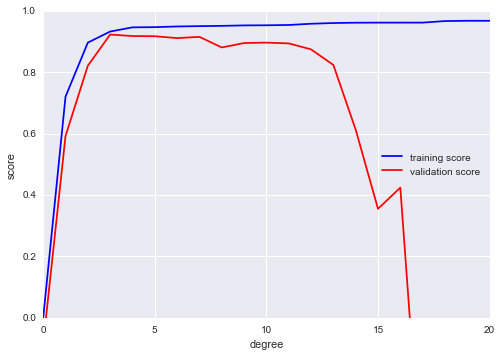

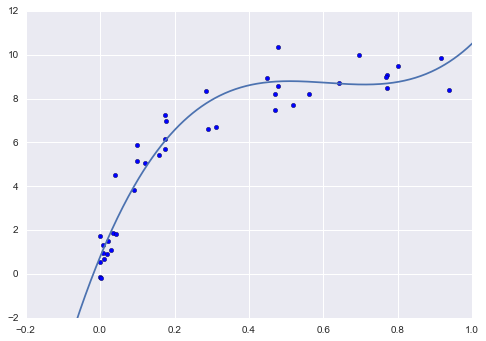

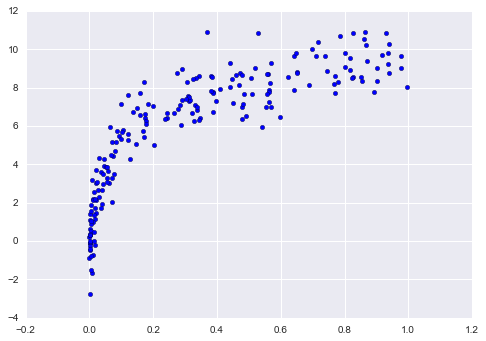

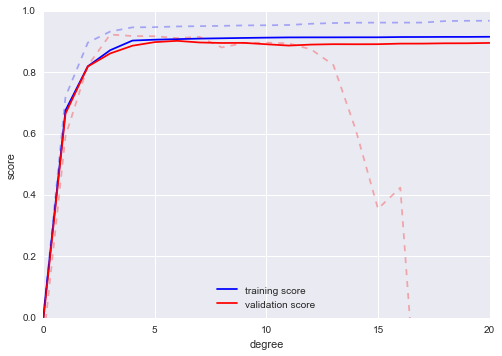

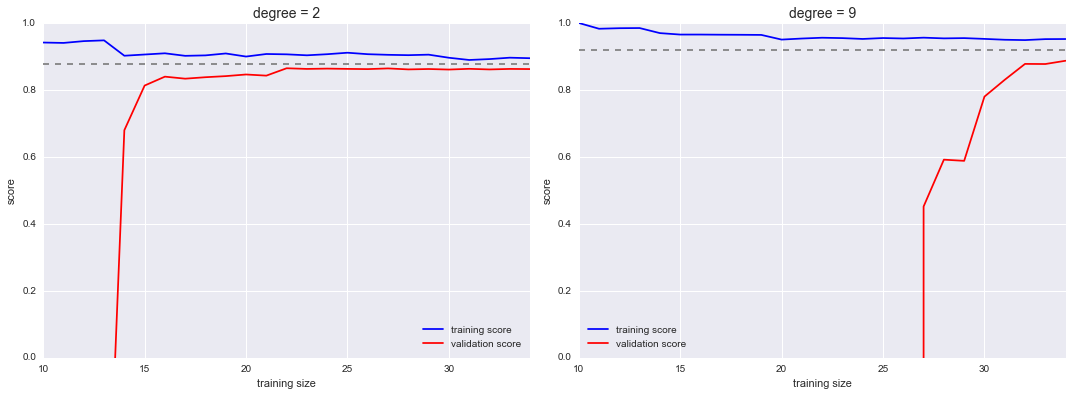

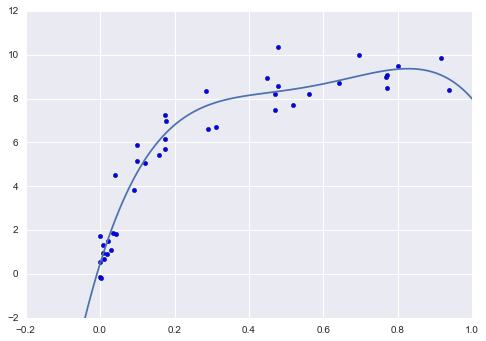

# [PythonDataScienceHandbook/notebooks/05.04-Feature-Engineering.ipynb](PythonDataScienceHandbook/notebooks/05.04-Feature-Engineering.ipynb)

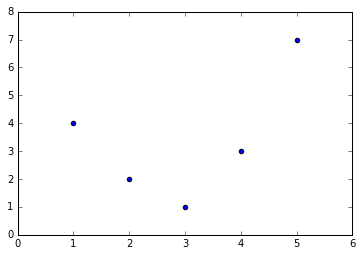

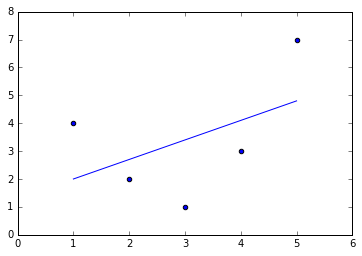

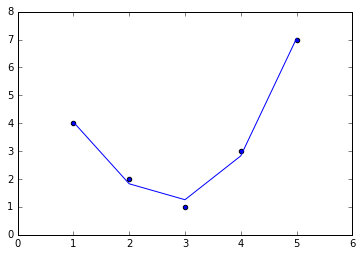

Button(description='Show 💩', style=ButtonStyle())

In [50]:
button